<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/fastText_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small'

data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    print(category_path)
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Texnologiya


In [3]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)


                                                 articles     category
0       Tesla barcha elektromobillarining narxini oshi...         Avto
1       UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto
2       Lego’ning 358 mingdan ortiq detali yordamida t...         Avto
3       Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto
4       Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto
...                                                   ...          ...
102955  Sony 7 mm qalinlikdagi yangi Xperia T3 smartfo...  Texnologiya
102956  Acer kompaniyasining yangi Iconia A1-830 plans...  Texnologiya
102957  LG G3 ommaboplikda Samsung Galaxy S5’ni ortda ...  Texnologiya
102958  Vertu kompaniyasi 8 ming yevrolik titan smartf...  Texnologiya
102959  Apple yangi iOS 8 operatsion tizimini taqdim e...  Texnologiya

[102960 rows x 2 columns]
Texnologiya      17541
Qonunchilik      14779
Sport            13403
Madaniyat        12798
Siyosat          12247
Iqtiso

In [4]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                 articles     category  labels
0       Tesla barcha elektromobillarining narxini oshi...         Avto       0
1       UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto       0
2       Lego’ning 358 mingdan ortiq detali yordamida t...         Avto       0
3       Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto       0
4       Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto       0
...                                                   ...          ...     ...
102955  Sony 7 mm qalinlikdagi yangi Xperia T3 smartfo...  Texnologiya      10
102956  Acer kompaniyasining yangi Iconia A1-830 plans...  Texnologiya      10
102957  LG G3 ommaboplikda Samsung Galaxy S5’ni ortda ...  Texnologiya      10
102958  Vertu kompaniyasi 8 ming yevrolik titan smartf...  Texnologiya      10
102959  Apple yangi iOS 8 operatsion tizimini taqdim e...  Texnologiya      10

[102960 rows x 3 columns]
            category  lab

In [5]:
del dataframe['category']

In [6]:
# sheffule the dataset
dataframe=dataframe.sample(frac=1)

In [7]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)

    return rep2

In [8]:
# apply normalization and special characters removal
# dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [9]:
# special symbol removal
print(dataframe)
# dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)

print(dataframe)

                                                articles  labels
21311  Qashqadaryoda 18 yoshli qiz uyi yonidan pichoq...       3
57681  Kofe miya qarishining oldini olishi mumkin\n\n...       7
64788  Xotin-qizlarni har tomonlama qo`llab-quvvatlas...       8
13447  O‘zbekiston va Tojikiston ishbilarmon doiralar...       2
23744  Qashqadaryoda nafaqa tayinlash uchun fuqarodan...       3
...                                                  ...     ...
94838  3-dekabr – tarixda birinchi yurak ko‘chirish o...      10
39442  Bolalik ta’mini eslatuvchi shirinlik – parvard...       5
23928  Toshkentda valyutafurushlar daliliy ashyolar b...       3
60522  O‘zbekiston elchisi Avstriya prezidentiga isho...       8
87523  Smartfon ekrani qizning ko‘zini “ilma-teshik” ...      10

[102960 rows x 2 columns]
                                                articles  labels
21311  Qashqadaryoda 18 yoshli qiz uyi yonidan pichoq...       3
57681  Kofe miya qarishining oldini olishi mumkin. Ra...       

In [10]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [11]:
# drawing density graph

In [12]:
#formating the dataset to the fasttext format __label___ data
dataframe['formatted']="__label__"+dataframe['labels'].astype(str)+" "+dataframe['articles']

In [13]:
dataframe.head(3)

,articles,labels,formatted
21311,Qashqadaryoda yoshli qiz uyi yonidan pichoqla...,3,__label__3 Qashqadaryoda yoshli qiz uyi yonid...
57681,Kofe miya qarishining oldini olishi mumkin. Ra...,7,__label__7 Kofe miya qarishining oldini olishi...
64788,Xotinqizlarni har tomonlama qo‘llabquvvatlash ...,8,__label__8 Xotinqizlarni har tomonlama qo‘llab...


In [14]:
# train test spliting and taking only the formated column
from sklearn.model_selection import train_test_split
train, test=train_test_split(dataframe['formatted'], test_size=0.2)

In [15]:
train.shape, test.shape

((82368,), (20592,))

In [16]:
# save the training and testing data
train.to_csv("news.train",header=False,index=False)
test.to_csv("news.test",header=False,index=False)

In [17]:
# !pip install fasttext-wheel

In [18]:
import fasttext as ft

In [19]:
# training the model
model=ft.train_supervised(input="news.train",loss='softmax',epoch=100, verbose=True)

In [20]:
# testing the model
predict=model.test("news.test")

In [21]:
print(predict)

(20592, 0.9374028749028749, 0.9374028749028749)


Accuracy: 0.9374514374514374
Precision: 0.9374246218759336
Recall: 0.9374514374514374
F1 Score: 0.9373908125955644
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1116
           1       0.84      0.79      0.81       540
          10       0.93      0.92      0.93      3572
           2       0.89      0.88      0.88      2536
           3       0.96      0.98      0.97       875
           4       0.96      0.96      0.96      2587
           5       0.98      0.97      0.98       390
           6       0.99      0.99      0.99      2917
           7       0.87      0.91      0.89       963
           8       0.92      0.92      0.92      2446
           9       0.99      0.99      0.99      2650

    accuracy                           0.94     20592
   macro avg       0.93      0.93      0.93     20592
weighted avg       0.94      0.94      0.94     20592



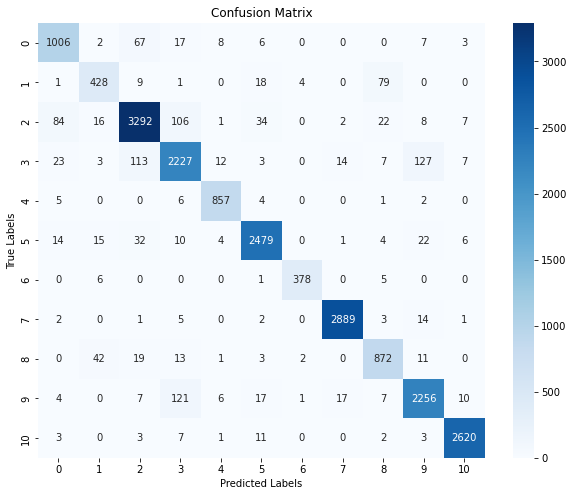

Confusion Matrix:
[[1006    2   67   17    8    6    0    0    0    7    3]
 [   1  428    9    1    0   18    4    0   79    0    0]
 [  84   16 3292  106    1   34    0    2   22    8    7]
 [  23    3  113 2227   12    3    0   14    7  127    7]
 [   5    0    0    6  857    4    0    0    1    2    0]
 [  14   15   32   10    4 2479    0    1    4   22    6]
 [   0    6    0    0    0    1  378    0    5    0    0]
 [   2    0    1    5    0    2    0 2889    3   14    1]
 [   0   42   19   13    1    3    2    0  872   11    0]
 [   4    0    7  121    6   17    1   17    7 2256   10]
 [   3    0    3    7    1   11    0    0    2    3 2620]]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your test data (assuming it's formatted as FastText expects)
test_file = "news.test"  # Replace "news.test" with your actual test file

# Get predictions and true labels
y_true = []
y_pred = []

with open(test_file, "r") as f:
    for line in f:
        label = line.split(" ")[0].replace("__label__", "")
        text = " ".join(line.split(" ")[1:]).strip() # Remove extra spaces and newlines
#         text = text.replace('\n', ' ') # Replace internal newlines with spaces
        prediction = model.predict(text)[0][0].replace("__label__", "")

        y_true.append(label)
        y_pred.append(prediction)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
report = classification_report(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{report}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(cm)

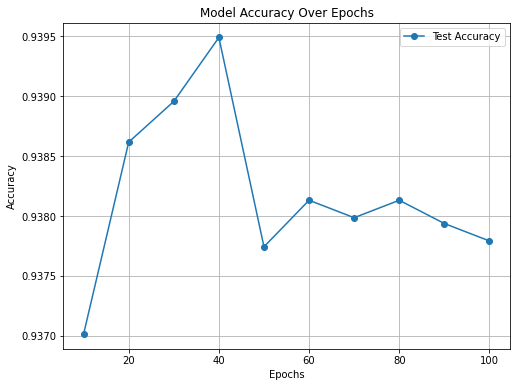

In [24]:
import matplotlib.pyplot as plt

# Lists to store accuracy values
epochs = list(range(10, 110, 10))  # Track every 10 epochs
# train_accuracies = []
test_accuracies = []

# Iteratively train and track accuracy
for epoch in epochs:
    model = ft.train_supervised(input="news.train", loss='softmax', epoch=epoch)
    
    # Track training accuracy
#     train_pred = model.test("news.train")
#     train_accuracies.append(train_pred[1])  # Accuracy value
    
    # Track test accuracy
    test_pred = model.test("news.test")
    test_accuracies.append(test_pred[1])  # Accuracy value

# Plot accuracy over epochs
plt.figure(figsize=(8, 6))
# plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()